In [52]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import statsmodels as sm
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import OLS
%matplotlib inline
import seaborn as sns


In [155]:
sns.set_context('poster')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = 10, 10

## EDA

In [33]:
train_data = pd.read_csv('dataset_1_train.txt')
test_data = pd.read_csv('dataset_1_test.txt')

In [34]:
train_data.head()

,TimeMin,PickupCount
0,860.0,33.0
1,17.0,75.0
2,486.0,13.0
3,300.0,5.0
4,385.0,10.0


Text(0,0.5,'Pickup count')

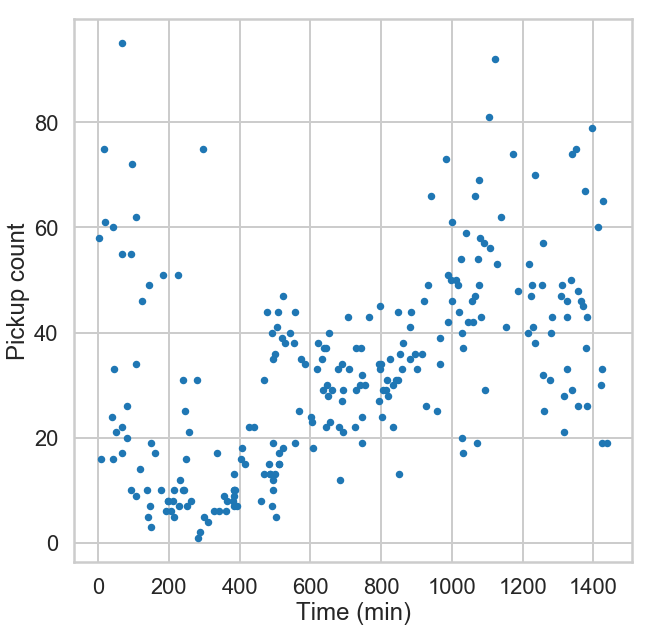

In [35]:
X_train = train_data['TimeMin']
y_train = train_data['PickupCount']
plt.scatter(X_train,y_train,s = 30)
plt.xlabel('Time (min)')
plt.ylabel('Pickup count')

In [48]:
from sklearn.preprocessing import normalize
train_data['NormTimeMin'] = train_data['TimeMin'] / 1440
test_data['NormTimeMin'] = test_data['TimeMin'] / 1440

In [50]:
train_data = train_data.sort_values(['NormTimeMin'])
test_data = test_data.sort_values(['NormTimeMin'])

Text(0,0.5,'Pickup count')

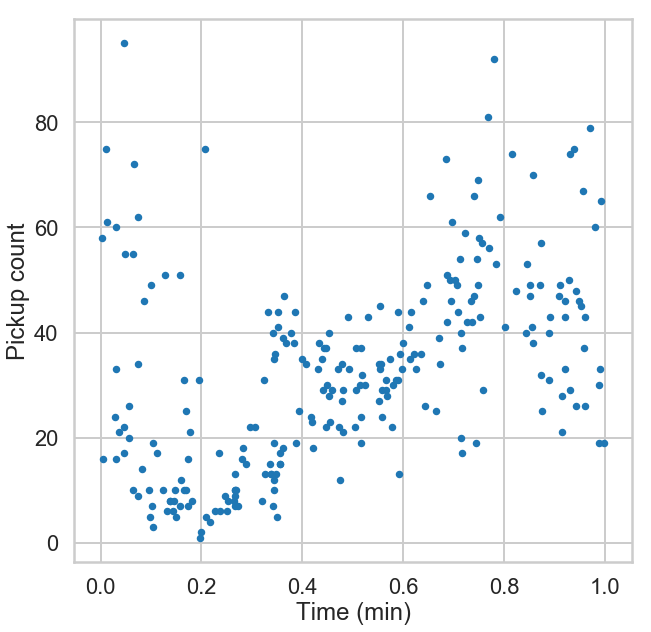

In [51]:
X_train = train_data['NormTimeMin']
y_train = train_data['PickupCount']
plt.scatter(X_train,y_train,s = 30)
plt.xlabel('Time (min)')
plt.ylabel('Pickup count')

### k-Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsRegressor

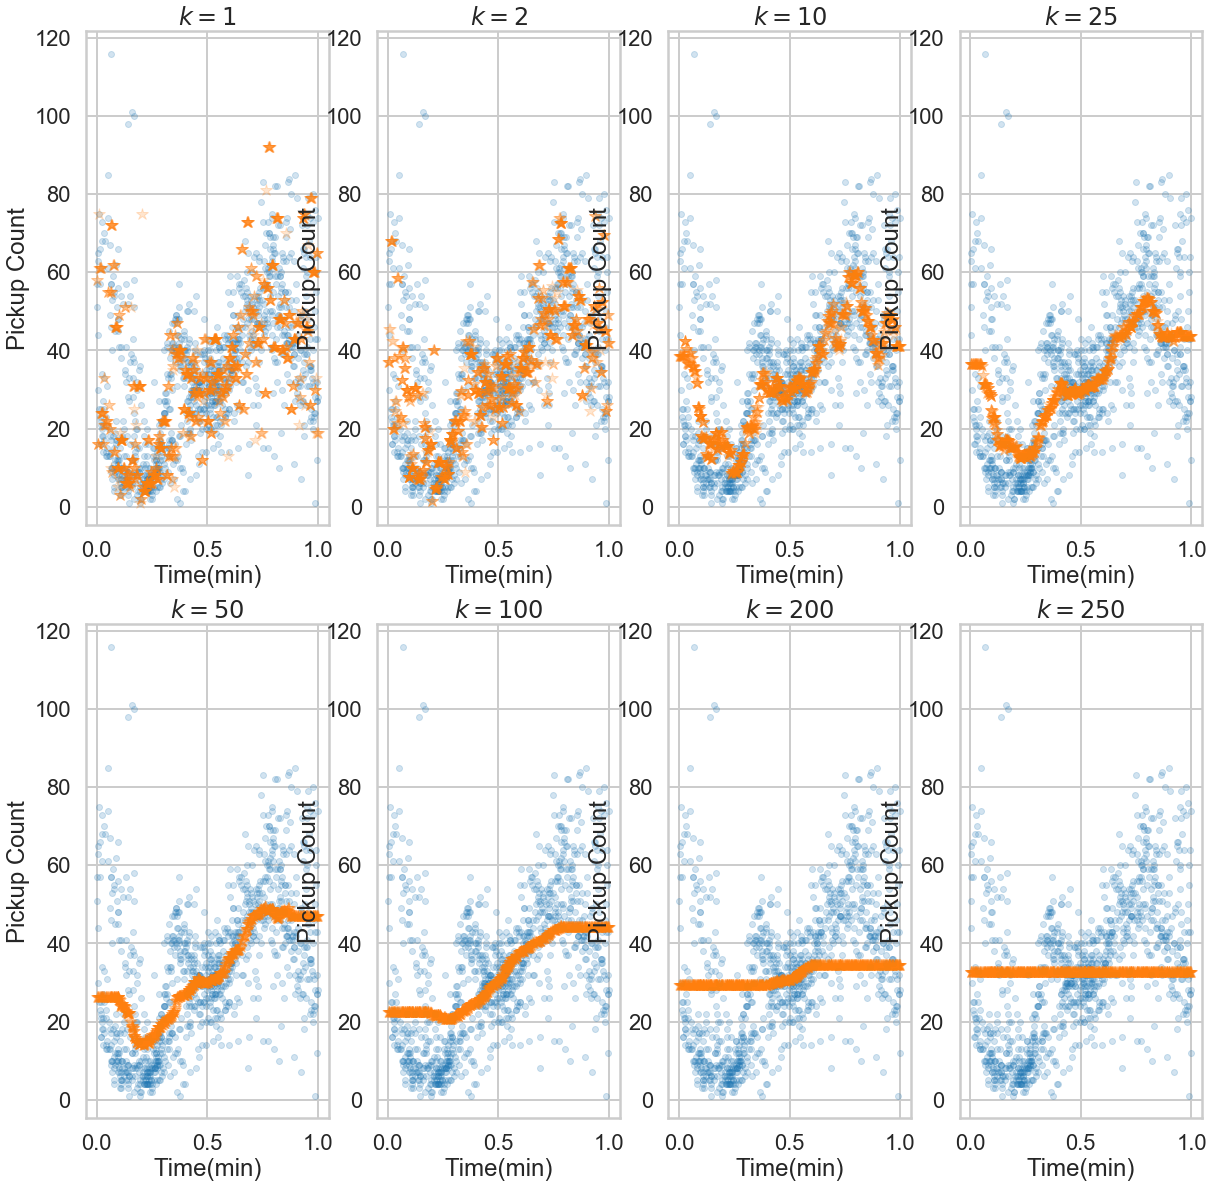

In [114]:
ks = [1, 2, 10, 25, 50, 100,200,250]
fig , ax = plt.subplots(2,4,figsize = (20,20))

ax = ax.ravel()
r2_train = []
r2_test = []
for i,k in enumerate(ks):
    knn_obj = KNeighborsRegressor(n_neighbors = k)
    fitting = knn_obj.fit(train_data[['NormTimeMin']],train_data[['PickupCount']])
    
    pred_pickup_train = fitting.predict(train_data[['NormTimeMin']])
    pred_pickup_test = fitting.predict(test_data[['NormTimeMin']])
    
    r2_train.append(r2_score(train_data['PickupCount'],pred_pickup_train))
    r2_test.append(r2_score(test_data['PickupCount'],pred_pickup_test))
    
    ax[i].plot(test_data[['NormTimeMin']],test_data[['PickupCount']],'.', alpha = 0.2,label = 'Actual')
    ax[i].plot(test_data[['NormTimeMin']],pred_pickup_test,'*',alpha = 0.2,label = 'Prediction')
    
    ax[i].set_title('$k = '+str(k)+'$')
    ax[i].set_xlabel('Time(min)')
    ax[i].set_ylabel('Pickup Count')

Text(0,0.5,'$R^2$')

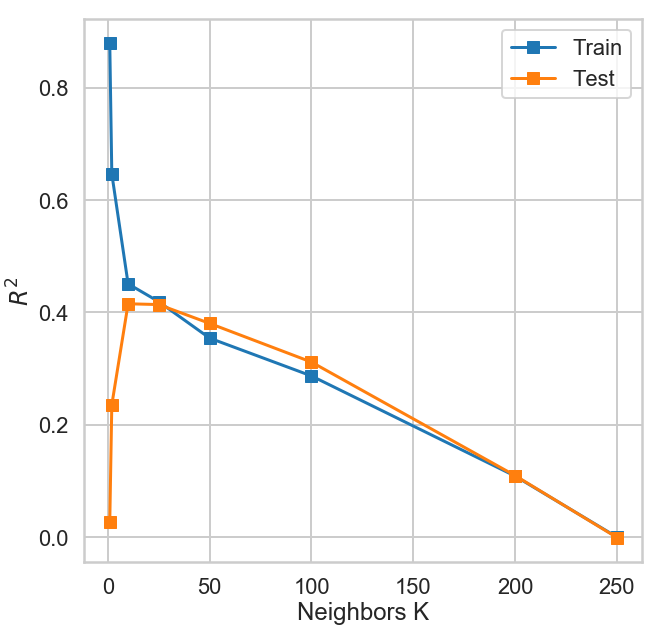

In [115]:
plt.figure(figsize=(10,10))
plt.plot(ks,r2_train,'s-',label='Train')
plt.plot(ks,r2_test,'s-',label='Test')
plt.legend(loc = 'best')
plt.xlabel('Neighbors K')
plt.ylabel('$R^2$')

### Simple Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS

In [101]:
X_train = train_data['NormTimeMin']
X_test = test_data['NormTimeMin']
y_train = train_data['PickupCount']
y_test = test_data['PickupCount']

X_train = add_constant(X_train)
X_test = add_constant(X_test)

In [104]:
model = OLS(y_train,X_train)
results = model.fit()

In [116]:
pred_pickup_train = results.predict(X_train)
pred_pickup_test = results.predict(X_test)

r2_train_ols = r2_score(y_train,pred_pickup_train)
r2_test_ols = r2_score(y_test,pred_pickup_test)

In [117]:
r2_test_ols,r2_train_ols

(0.24771232994848624, 0.20721375209894033)

Text(0,0.5,'$R^2$')

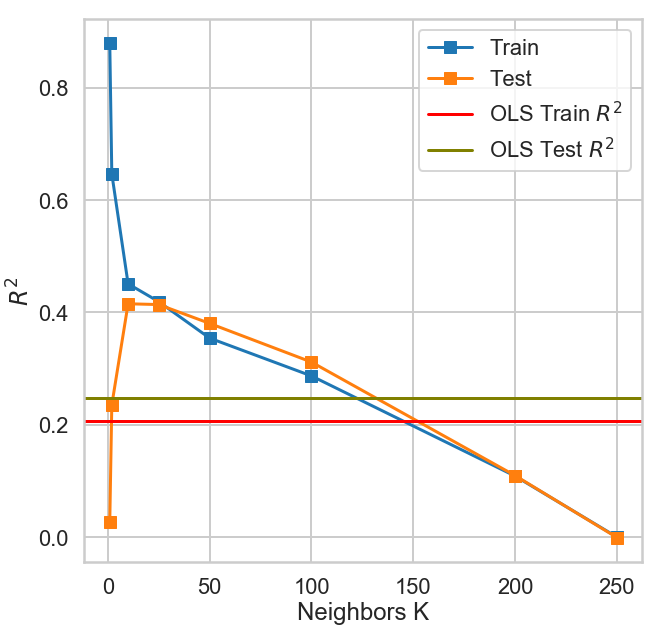

In [122]:
plt.figure(figsize=(10,10))
plt.plot(ks,r2_train,'s-',label='Train')
plt.plot(ks,r2_test,'s-',label='Test')
plt.axhline(r2_train_ols,label='OLS Train $R^2$',color = 'red')
plt.axhline(r2_test_ols,label='OLS Test $R^2$',color = 'olive')
plt.legend(loc = 'best')
plt.xlabel('Neighbors K')
plt.ylabel('$R^2$')

In [125]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            PickupCount   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     64.82
Date:                Wed, 14 Aug 2019   Prob (F-statistic):           3.43e-14
Time:                        13:15:04   Log-Likelihood:                -1060.1
No. Observations:                 250   AIC:                             2124.
Df Residuals:                     248   BIC:                             2131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          18.0264      2.121      8.501      

In [133]:
residual = y_train - pred_pickup_train
residual.shape,y_train.shape

((250,), (250,))

train_data shape:  (250, 3)
residuals shape:  (1, 250)
y_hat_train shape:  (250,)


Text(0,0.5,'Count')

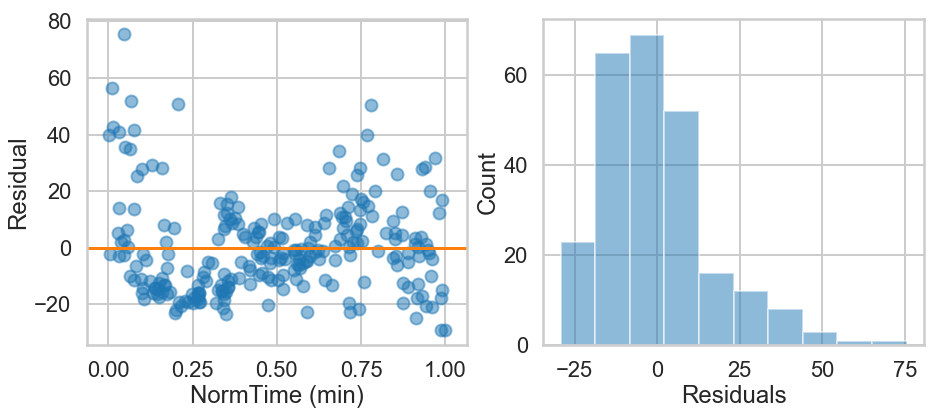

In [147]:
fig, axs = plt.subplots(1,2, figsize=(15, 6))

residuals = (train_data[['PickupCount']].T - pred_pickup_train)

print('train_data shape: ', train_data.shape)
print('residuals shape: ', residuals.shape)
print('y_hat_train shape: ', pred_pickup_train.shape)

axs[0].scatter(train_data[['NormTimeMin']], 
               residuals, alpha=0.5)
axs[0].axhline(y=0, color=sns.color_palette()[1]) 
axs[0].set_xlabel('NormTime (min)')
axs[0].set_ylabel('Residual')

axs[1].hist(residuals.T.values, alpha=0.5)
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Count')

### Polynomial Regression

In [148]:
gen_poly_terms = PolynomialFeatures(degree=3,interaction_only=False)
X_train_with_poly = gen_poly_terms.fit_transform(X_train)
X_test_with_poly = gen_poly_terms.fit_transform(X_test)

poly_reg_model = LinearRegression(fit_intercept=True)
poly_reg_model.fit(X_train_with_poly,train_data['PickupCount'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

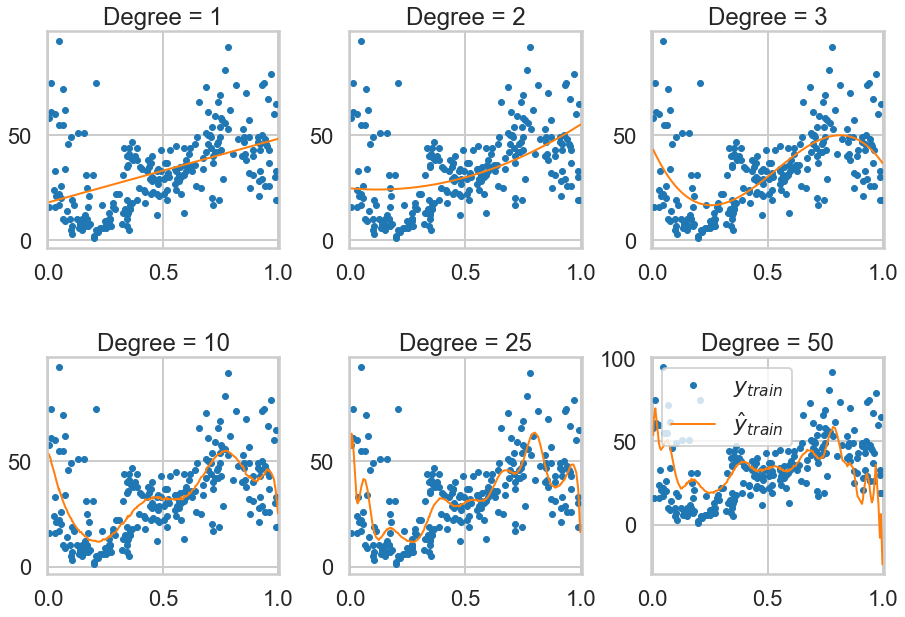

In [153]:
fig, axs = plt.subplots(2,3, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.3)
axs = axs.ravel()
degrees = [1, 2, 3, 10, 25, 50]

r2_train = [] 
r2_test = []

for i,d in enumerate(degrees):
    gen_poly_terms = PolynomialFeatures(degree=d)
    
    X_train_with_poly = gen_poly_terms.fit_transform(X_train)
    X_test_with_poly = gen_poly_terms.fit_transform(X_test)
    
    poly_regression_model = LinearRegression(fit_intercept=True)
    poly_regression_model.fit(X_train_with_poly,train_data['PickupCount'])
    
    y_hat_train = poly_regression_model.predict(X_train_with_poly)
    y_hat_test = poly_regression_model.predict(X_test_with_poly)    
    
    r2_train.append( r2_score(train_data[['PickupCount']], y_hat_train))
    r2_test.append( r2_score(test_data[['PickupCount']], y_hat_test))
    
    axs[i].plot(train_data[['NormTimeMin']], train_data['PickupCount'], '.', label='$y_{train}$')
    axs[i].plot(train_data[['NormTimeMin']], y_hat_train, lw=2, label='$\hat{y}_{train}$')
    axs[i].set_title("Degree = " + str(d))
    axs[i].set_xlim(-.005,1.005)

# Turn on the legend
axs[i].legend(loc = 'best')

Polynomial degree [1, 2, 3, 10, 25, 50]
Training R^2 [0.20721375209894033, 0.2324332710285808, 0.3748362391177078, 0.4213680989725177, 0.45748692484184583, 0.09357505141131406]


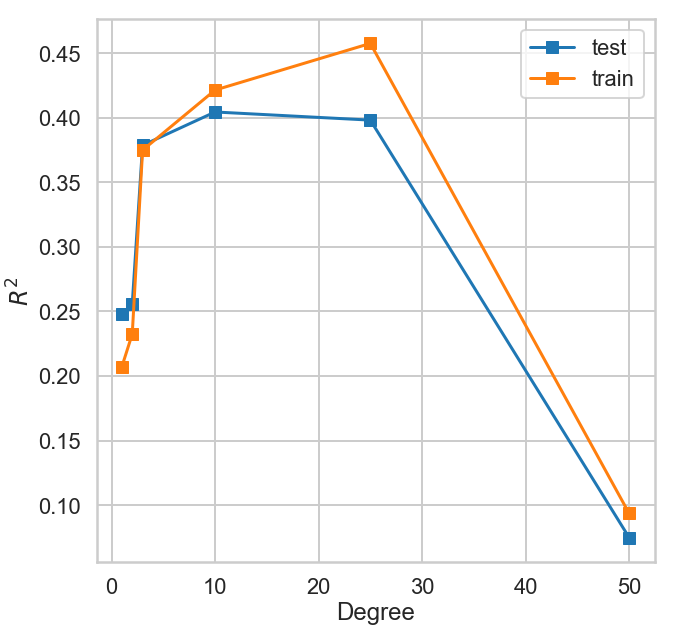

In [156]:
plt.plot(degrees, r2_test, 's-', label='test')
plt.plot(degrees, r2_train, 's-', label='train')
plt.xlabel('Degree')
plt.ylabel('$R^2$')
plt.legend()

# plt.gca().set_yscale('log')
print('Polynomial degree', degrees)
print('Training R^2', r2_train)

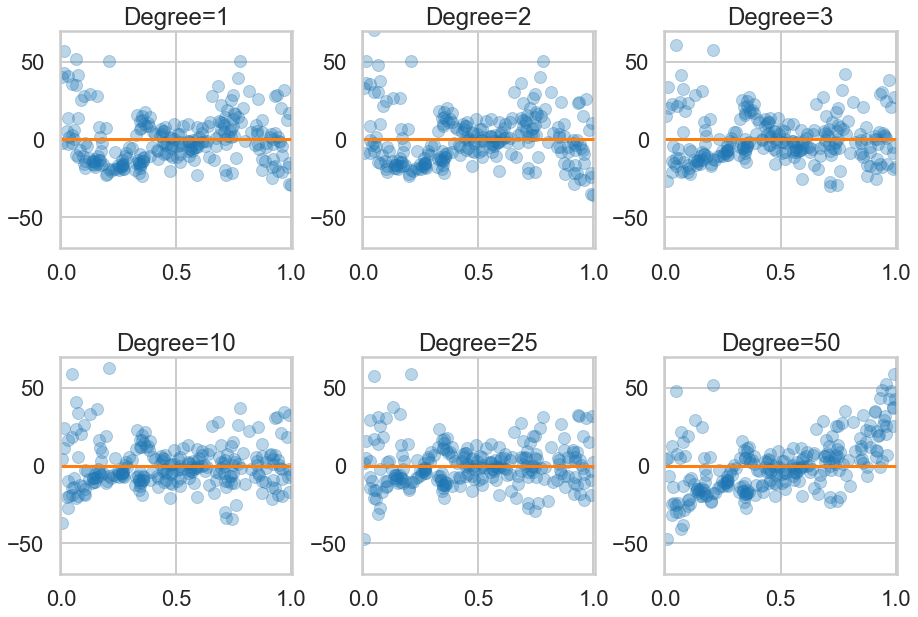

In [158]:
fig, axs = plt.subplots(2,3, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.3)
axs = axs.ravel()
degrees = [1, 2, 3, 10, 25, 50]

r2_train = [] 
r2_test = []

i =0 
for i,d in enumerate(degrees):
    gen_poly_terms = PolynomialFeatures(degree=d, interaction_only=False)
    X_train_with_poly = gen_poly_terms.fit_transform(X_train)
    X_test_with_poly = gen_poly_terms.fit_transform(X_test)
    
    poly_regression_model = LinearRegression(fit_intercept=True)
    poly_regression_model.fit(X_train_with_poly, train_data['PickupCount'])
    
    
    
    y_hat_train = poly_regression_model.predict(X_train_with_poly)
    y_hat_test = poly_regression_model.predict(X_test_with_poly)
    
    r2_train.append( r2_score(train_data[['PickupCount']], y_hat_train))
    r2_test.append( r2_score(test_data[['PickupCount']], y_hat_test))
    
    residuals = train_data['PickupCount'] - y_hat_train
    
    axs[i].scatter(train_data[['NormTimeMin']], residuals, lw=1, alpha=0.3)
    axs[i].axhline(y=0, color=sns.color_palette()[1]) 
    axs[i].set_title("Degree=" + str(d))
    axs[i].set_xlim(-.005,1.005)
    axs[i].set_ylim(-70, 70)